In [ ]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [ ]:
data = pd.read_csv('StudentsPerformance.csv')

# getting the shape of the data
print(data.shape)

(1000, 8)


In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Descriptive Statistics


In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Lets check the no. of unique items present in the categorical column



In [ ]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

lets check the percentage of missing data in each columns present in the data :



In [ ]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


To see comparison of all other attributes with respect to Math Marks



Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='math score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.04E-01'}, xlabel='reading score', ylabel='math score'>,
         <Axes: title={'center': 'F=7.78E-01'}, xlabel='writing score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.58E-02'}, xlabel='math score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.77E-02'}, xlabel='math score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=1.34E-02'}, xlabel='math score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=5.85E-03'}, xlabel='math score', ylabel='lunch'>,
         <Axes: title={'center': 'F=4.67E-03'}, xlabel='math score', ylabel='test preparation course'>]],
       dtype=object)]

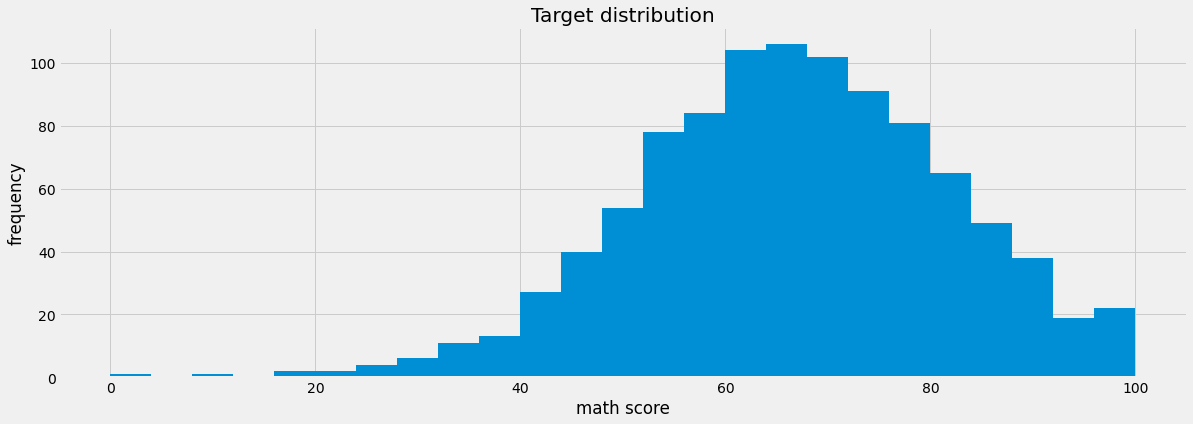

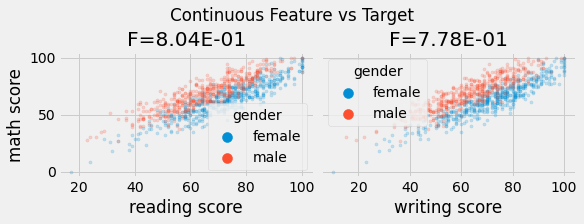

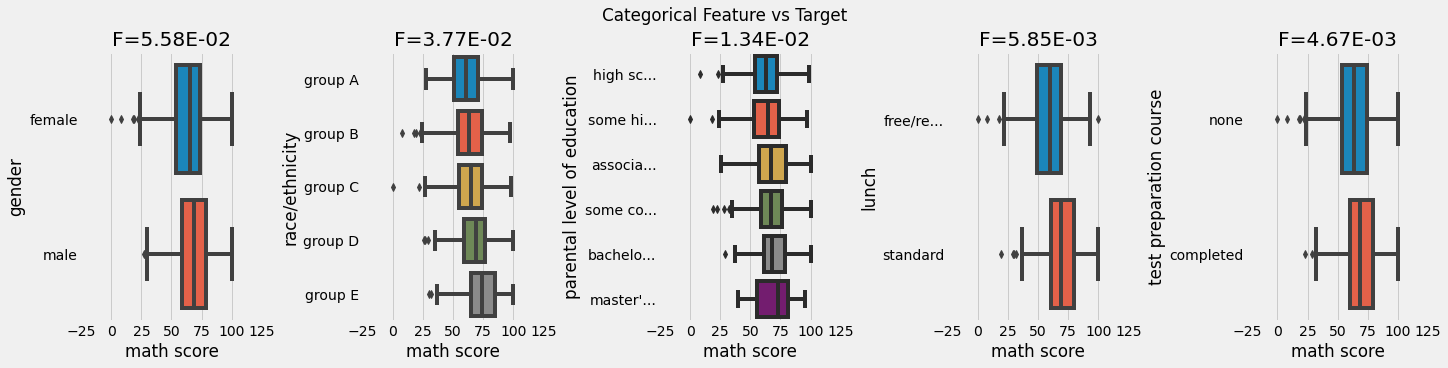

In [ ]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

**Comparison of all other attributes with respect to Reading Marks :**

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='reading score', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.49E-01'}, xlabel='writing score', ylabel='reading score'>,
         <Axes: title={'center': 'F=8.04E-01'}, xlabel='math score'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=4.00E-02'}, xlabel='reading score', ylabel='gender'>,
         <Axes: title={'center': 'F=3.94E-02'}, xlabel='reading score', ylabel='race/ethnicity'>,
         <Axes: title={'center': 'F=2.62E-02'}, xlabel='reading score', ylabel='parental level of education'>,
         <Axes: title={'center': 'F=6.47E-03'}, xlabel='reading score', ylabel='lunch'>,
         <Axes: title={'center': 'F=0.00E+00'}, xlabel='reading score', ylabel='test preparation course'>]],
       dtype=object)]

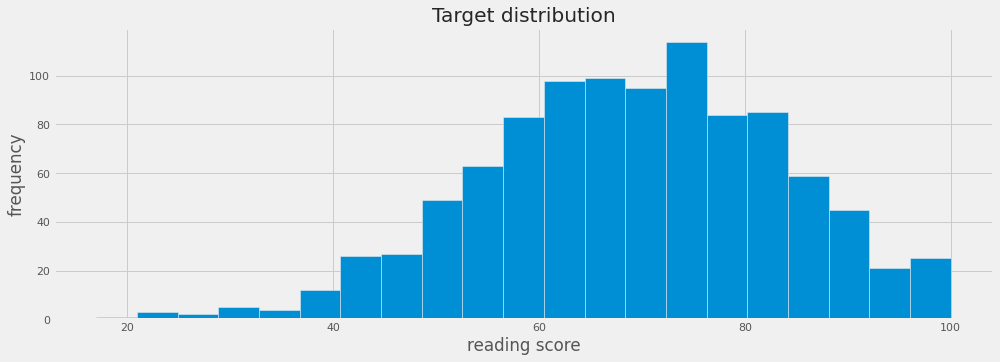

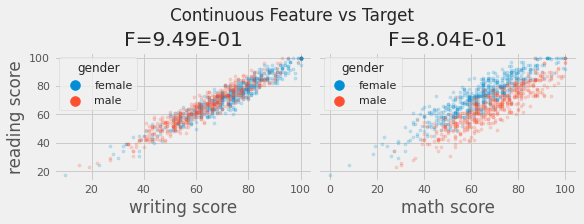

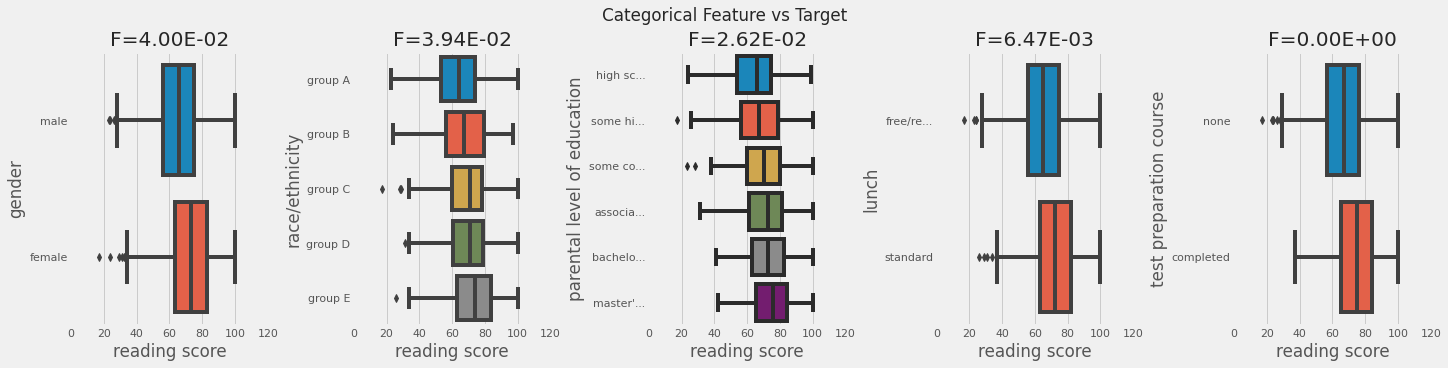

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

**Lets check the Effect of Lunch on Student’s Performnce**

In [ ]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

**Lets check the Effect of Test Preparation Course on Scores**

In [ ]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

**Data Visualizations**

**Visualizing the number of male and female in the data set**

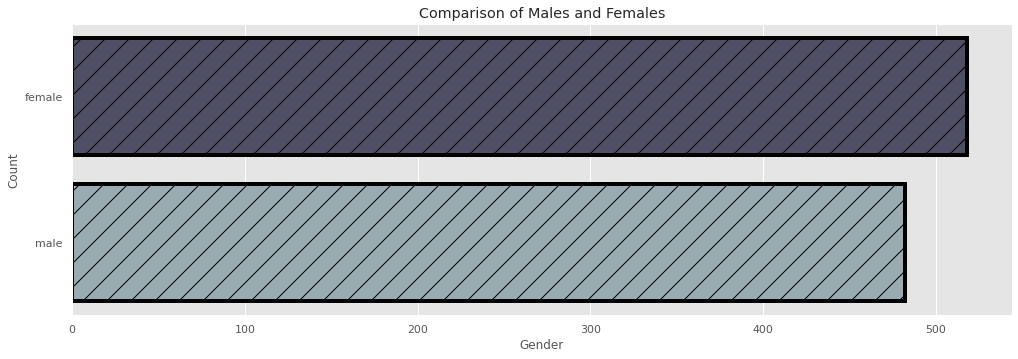

female    518
male      482
Name: gender, dtype: int64

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
#ax=sns.countplot(x="Gender", hue="children", data=df, palette="binary")
#df["Numbers"] = [float(str(i).replace(",", "")) for i in df["Numbers"]]
#data["gender"] = [float(str(i).replace(",", "")) for i in data["gender"]]

sns.countplot(y='gender', data=data, palette = 'bone', lw=4, ec='black', hatch='/')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

data.gender.value_counts(sort=False)

**Visualizing the different groups in the data set**

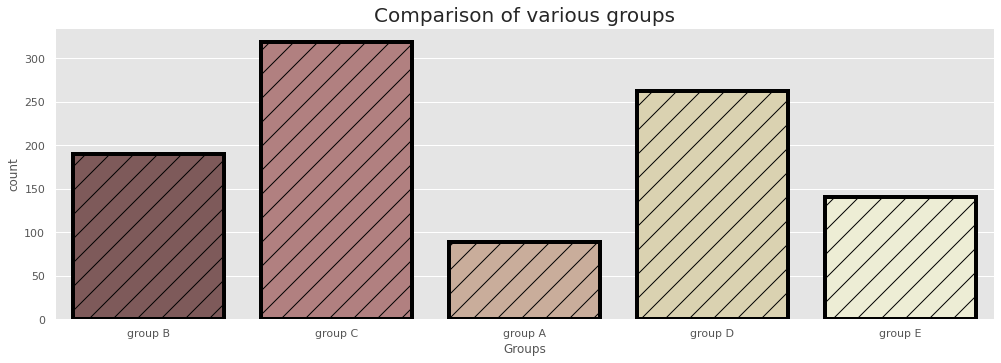

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')

sns.countplot(x='race/ethnicity', data=data, palette = 'pink', lw=4, ec='black', hatch='/',)
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

**Visualizing the different parental education levels**



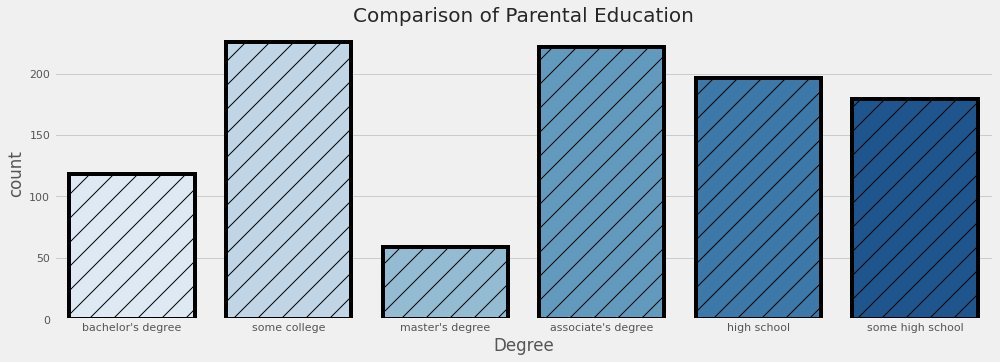

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

sns.countplot(x='parental level of education', data=data, palette = 'Blues', lw=4, ec='black', hatch='/',)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

**Visualizing Maths score**

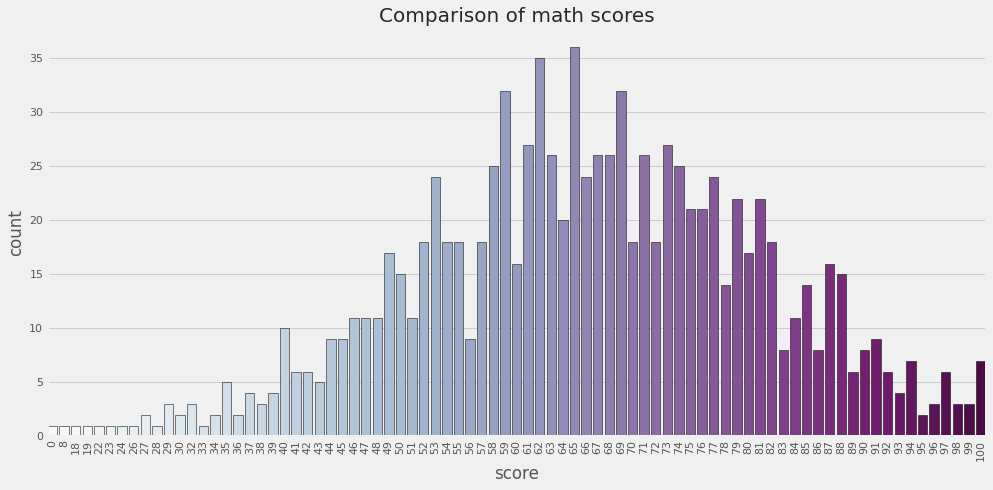

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('tableau-colorblind10')

sns.countplot(x='math score', data=data, palette = 'BuPu', ec='black')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

**Computing the total score for each student**

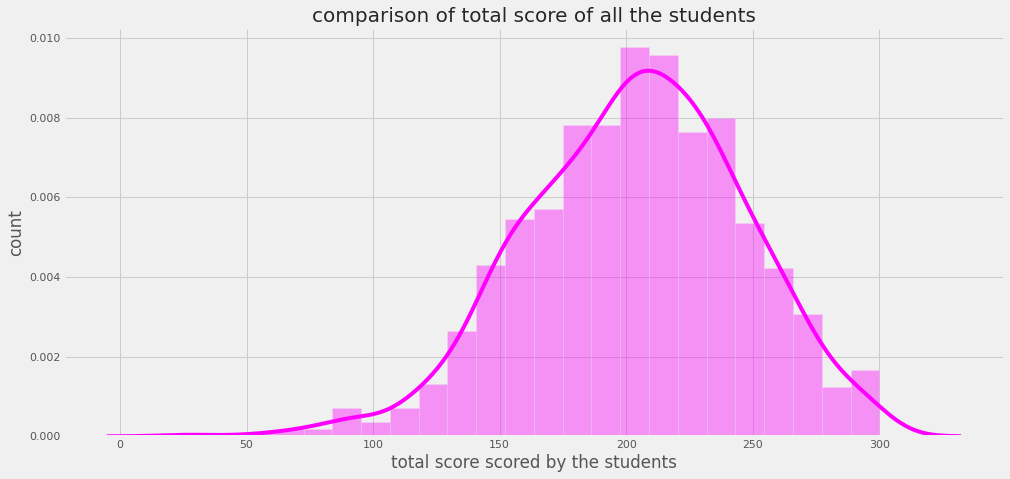

In [ ]:
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

**Computing percentage for each of the students**

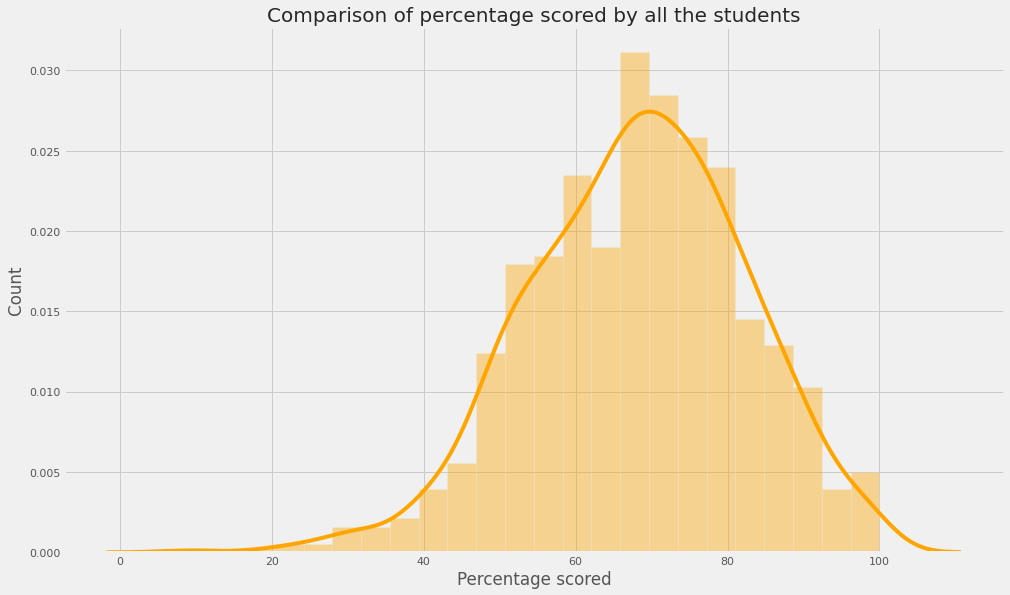

In [ ]:
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

Assigning grades to the grades according to the following criteria:

0  - 40 marks : grade E

41 - 60 marks : grade D

60 - 70 marks : grade C

70 - 80 marks : grade B

80 - 90 marks : grade A

90 - 100 marks : grade O

In [ ]:
def getgrade(percentage, status):
  if status == 'Fail':
    return 'E'
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )

data['grades'].value_counts()

KeyError: ignored

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()

# label encoding for test preparation course
data['test preparation course'] = le.fit_transform(data['test preparation course'])

# label encoding for lunch
data['lunch'] = le.fit_transform(data['lunch'])

# label encoding for race/ethnicity
# we have to map values to each of the categories
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

# label encoding for parental level of education
data['parental level of education'] = le.fit_transform(data['parental level of education'])

#label encoding for gender
data['gender'] = le.fit_transform(data['gender'])

# label encoding for pass_math
data['math score'] = le.fit_transform(data['math score'])

# label encoding for pass_reading
data['reading score'] = le.fit_transform(data['reading score'])

# label encoding for pass_writing
data['writing score'] = le.fit_transform(data['writing score'])

# label encoding for status
data['status'] = le.fit_transform(data['status'])

KeyError: ignored

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73.0
1,female,group C,some college,standard,completed,69,90,88,247,83.0
2,female,group B,master's degree,standard,none,90,95,93,278,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,50.0
4,male,group C,some college,standard,none,76,78,75,229,77.0
